In [7]:
#importing functions 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from skimage.util.montage import montage2d
import tflearn
from PIL import Image
%matplotlib inline

In [8]:
#importing data
from tensorflow.examples.tutorials.mnist import input_data
#one hot encoding returns an array of zeros and a single one. One corresponds to the class
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [9]:
print("Shape of images in training dataset {}".format(data.train.images.shape))
print("Shape of classes in training dataset {}".format(data.train.labels.shape))
print("Shape of images in testing dataset {}".format(data.test.images.shape))
print("Shape of classes in testing dataset {}".format(data.test.labels.shape))
print("Shape of images in validation dataset {}".format(data.validation.images.shape))
print("Shape of classes in validation dataset {}".format(data.validation.labels.shape))

Shape of images in training dataset (55000, 784)
Shape of classes in training dataset (55000, 10)
Shape of images in testing dataset (10000, 784)
Shape of classes in testing dataset (10000, 10)
Shape of images in validation dataset (5000, 784)
Shape of classes in validation dataset (5000, 10)


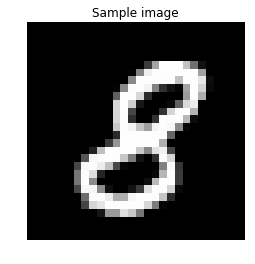

In [10]:
#sample image
sample=data.train.images[5].reshape(28,28) 
plt.imshow(sample ,cmap='gray')
plt.title('Sample image')
plt.axis('off')
plt.show()

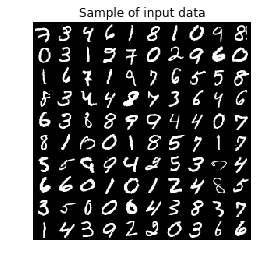

In [11]:
# function to display montage of input data 
imgs=data.train.images[0:100]
montage_img=np.zeros([100,28,28])
for i in range(len(imgs)) : 
        montage_img[i]=imgs[i].reshape(28,28) 
plt.imshow(montage2d(montage_img), cmap='gray')
plt.title('Sample of input data')
plt.axis('off')
plt.show()

In [12]:
images=data.train.images
images=np.reshape(images,[images.shape[0],28,28])
mean_img = np.mean(images, axis=0)
std_img = np.std(images, axis=0)

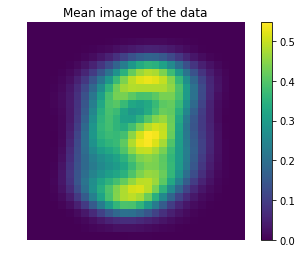

In [13]:
plt.imshow(mean_img)
plt.title('Mean image of the data')
plt.colorbar()
plt.axis('off')
plt.show()

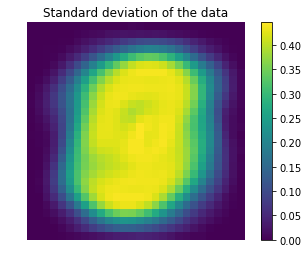

In [14]:
plt.imshow(std_img)
plt.colorbar()
plt.title('Standard deviation of the data')
plt.axis('off')
plt.show()

In [15]:
#input - shape 'None' states that, the value can be anything, i.e we can feed in any number of images
#input image
x=tf.placeholder(tf.float32,shape=[None,784]) 
#input class
y_=tf.placeholder(tf.float32,shape=[None, 10])

In [16]:
#Input Layer

#reshaping input for convolutional operation in tensorflow
# '-1' states that there is no fixed batch dimension, 28x28(=784) is reshaped from 784 pixels and '1' for a single
#channel, i.e a gray scale image
x_input=tf.reshape(x,[-1,28,28,1], name='input')
#first convolutional layer with 32 output filters, filter size 5x5, stride of 2,same padding, and RELU activation.
#please note, I am not adding bias, but one could add bias.Optionally you can add max pooling layer as well 
conv_layer1=tflearn.layers.conv.conv_2d(x_input, nb_filter=32, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu', regularizer="L2", name='conv_layer_1')

#2x2 max pooling layer
out_layer1=tflearn.layers.conv.max_pool_2d(conv_layer1, 2)


#second convolutional layer 
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1, nb_filter=32, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer2=tflearn.layers.conv.max_pool_2d(conv_layer2, 2)
#fully connected layer
fcl= tflearn.layers.core.fully_connected(out_layer2, 1024, activation='relu')
fcl_dropout = tflearn.layers.core.dropout(fcl, 0.8)
y_predicted = tflearn.layers.core.fully_connected(fcl_dropout, 10, activation='softmax', name='output')

In [17]:
print("Shape of input : {}".format(x_input.get_shape().as_list()))
print("Shape of first convolutional layer : {}".format(out_layer1.get_shape().as_list()))
print("Shape of second convolutional layer : {}".format(out_layer2.get_shape().as_list()))
print("Shape of fully connected layer : {}".format(fcl.get_shape().as_list()))
print("Shape of output layer : {}".format(y_predicted.get_shape().as_list()))


Shape of input : [None, 28, 28, 1]
Shape of first convolutional layer : [None, 14, 14, 32]
Shape of second convolutional layer : [None, 7, 7, 32]
Shape of fully connected layer : [None, 1024]
Shape of output layer : [None, 10]


In [18]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_predicted), reduction_indices=[1]))
#optimiser -
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y_predicted,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
#session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [20]:
#session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [21]:
# grabbing the default graph
g = tf.get_default_graph()

# every operations in our graph
[op.name for op in g.get_operations()]

['is_training/Initializer/Const',
 'is_training',
 'is_training/Assign',
 'is_training/read',
 'Assign/value',
 'Assign',
 'Assign_1/value',
 'Assign_1',
 'Placeholder',
 'Placeholder_1',
 'input/shape',
 'input',
 'conv_layer_1/W/Initializer/random_uniform/shape',
 'conv_layer_1/W/Initializer/random_uniform/min',
 'conv_layer_1/W/Initializer/random_uniform/max',
 'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 'conv_layer_1/W/Initializer/random_uniform/sub',
 'conv_layer_1/W/Initializer/random_uniform/mul',
 'conv_layer_1/W/Initializer/random_uniform',
 'conv_layer_1/W',
 'conv_layer_1/W/Assign',
 'conv_layer_1/W/read',
 'conv_layer_1/W/Regularizer/L2Loss',
 'conv_layer_1/W/Regularizer/L2-Loss/y',
 'conv_layer_1/W/Regularizer/L2-Loss',
 'conv_layer_1/b/Initializer/Const',
 'conv_layer_1/b',
 'conv_layer_1/b/Assign',
 'conv_layer_1/b/read',
 'conv_layer_1/Conv2D',
 'conv_layer_1/BiasAdd',
 'conv_layer_1/Relu',
 'MaxPool2D/MaxPool',
 'conv_layer_2/W/Initializer/random_unifor

In [22]:
# grabbing the default graph
g = tf.get_default_graph()

# every operations in our graph
[op.name for op in g.get_operations()]

['is_training/Initializer/Const',
 'is_training',
 'is_training/Assign',
 'is_training/read',
 'Assign/value',
 'Assign',
 'Assign_1/value',
 'Assign_1',
 'Placeholder',
 'Placeholder_1',
 'input/shape',
 'input',
 'conv_layer_1/W/Initializer/random_uniform/shape',
 'conv_layer_1/W/Initializer/random_uniform/min',
 'conv_layer_1/W/Initializer/random_uniform/max',
 'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 'conv_layer_1/W/Initializer/random_uniform/sub',
 'conv_layer_1/W/Initializer/random_uniform/mul',
 'conv_layer_1/W/Initializer/random_uniform',
 'conv_layer_1/W',
 'conv_layer_1/W/Assign',
 'conv_layer_1/W/read',
 'conv_layer_1/W/Regularizer/L2Loss',
 'conv_layer_1/W/Regularizer/L2-Loss/y',
 'conv_layer_1/W/Regularizer/L2-Loss',
 'conv_layer_1/b/Initializer/Const',
 'conv_layer_1/b',
 'conv_layer_1/b/Assign',
 'conv_layer_1/b/read',
 'conv_layer_1/Conv2D',
 'conv_layer_1/BiasAdd',
 'conv_layer_1/Relu',
 'MaxPool2D/MaxPool',
 'conv_layer_2/W/Initializer/random_unifor

In [23]:
#number of interations
epoch=15000
batch_size=50

In [26]:
for i in range(epoch):
    #batch wise training 
    x_batch, y_batch = data.train.next_batch(batch_size)
    _,loss=sess.run([train_step, cross_entropy], feed_dict={x: x_batch,y_: y_batch})
    #_, loss,acc=sess.run([train_step,cross_entropy,accuracy], feed_dict={x:input_image , y_: input_class})
    if i%500==0:    
        Accuracy=sess.run(accuracy,
                           feed_dict={
                        x: data.test.images,
                        y_: data.test.labels
                      })
        Accuracy=round(Accuracy*100,2)
        print("Loss : {} , Accuracy on test set : {} %" .format(loss, Accuracy))
    elif i%100==0:
        print("Loss : {}" .format(loss))

(10000, 784)
(10000, 10)
Loss : 0.28664886951446533 , Accuracy on test set : 92.37 %
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(10000, 10)
(10000, 784)
(1

KeyboardInterrupt: 

In [18]:
validation_accuracy=round((sess.run(accuracy,
                            feed_dict={
                             x: data.validation.images,
                             y_: data.validation.labels
                              }))*100,2)
print(data.validation.labels)
print("Accuracy in the validation dataset: {}%".format(validation_accuracy))

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]
Accuracy in the validation dataset: 8.26%


In [23]:
validation_accuracy=round((sess.run(accuracy,
                            feed_dict={
                             x: data.validation.images,
                             y_: data.validation.labels
                              }))*100,2)

print("Accuracy in the validation dataset: {}%".format(validation_accuracy))

Accuracy in the validation dataset: 99.08%


In [24]:
#testset predictions
y_test=(sess.run(y_predicted,feed_dict={
                             x: data.test.images
                              }))

In [25]:
#Confusion Matrix
true_class=np.argmax(data.test.labels,1)
predicted_class=np.argmax(y_test,1)
cm=confusion_matrix(predicted_class,true_class)
cm

array([[ 977,    0,    1,    1,    0,    0,    3,    0,    2,    0],
       [   0, 1134,    3,    0,    1,    0,    2,    3,    0,    0],
       [   0,    0, 1021,    0,    1,    0,    0,    1,    1,    0],
       [   0,    0,    0, 1002,    0,    5,    0,    1,    0,    1],
       [   0,    0,    0,    0,  974,    0,    1,    0,    0,    6],
       [   0,    0,    0,    3,    0,  886,    5,    0,    2,    4],
       [   1,    0,    1,    0,    1,    1,  945,    0,    0,    0],
       [   1,    1,    4,    0,    0,    0,    0, 1021,    1,    1],
       [   1,    0,    2,    3,    0,    0,    2,    1,  965,    1],
       [   0,    0,    0,    1,    5,    0,    0,    1,    3,  996]])

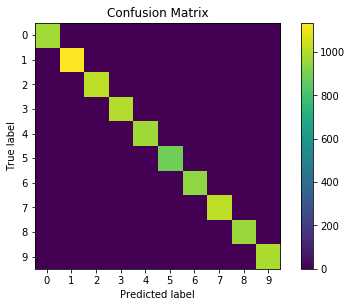

In [26]:
#Plotting confusion Matrix
plt.imshow(cm,interpolation='nearest')
plt.colorbar()
number_of_class=len(np.unique(true_class))
tick_marks = np.arange(len(np.unique(true_class)))
plt.xticks(tick_marks, range(number_of_class))
plt.yticks(tick_marks, range(number_of_class))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

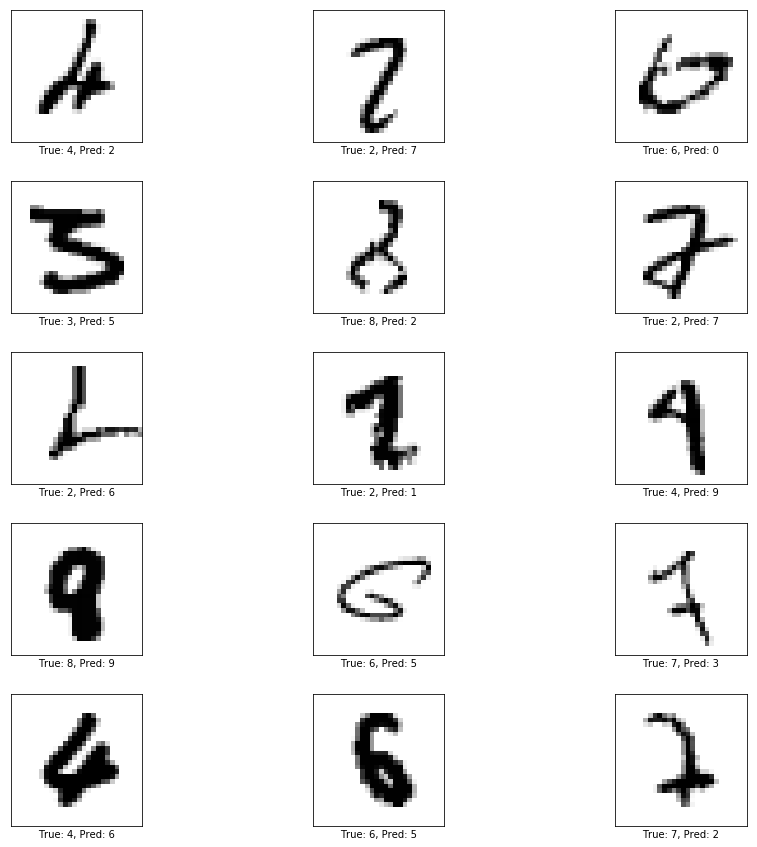

In [27]:
#Finding error outputs
idx=np.argmax(y_test,1)==np.argmax(data.test.labels,1) 
cmp=np.where(idx==False) #indices of error outputs
# plotting errors
fig, axes = plt.subplots(5, 3, figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
cls_true=np.argmax(data.test.labels,1)[cmp]
cls_pred=np.argmax(y_test,1)[cmp]
images=data.test.images[cmp]
for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28,28), cmap='binary')
        xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])      
plt.show()


In [29]:
conv_layer1_filters=conv_layer1.W.eval()
print(conv_layer1_filters.shape)

(5, 5, 1, 32)


In [30]:
conv_layer1_filters_img=conv_layer1_filters[:,:,0,:]
print(conv_layer1_filters_img.shape)

(5, 5, 32)


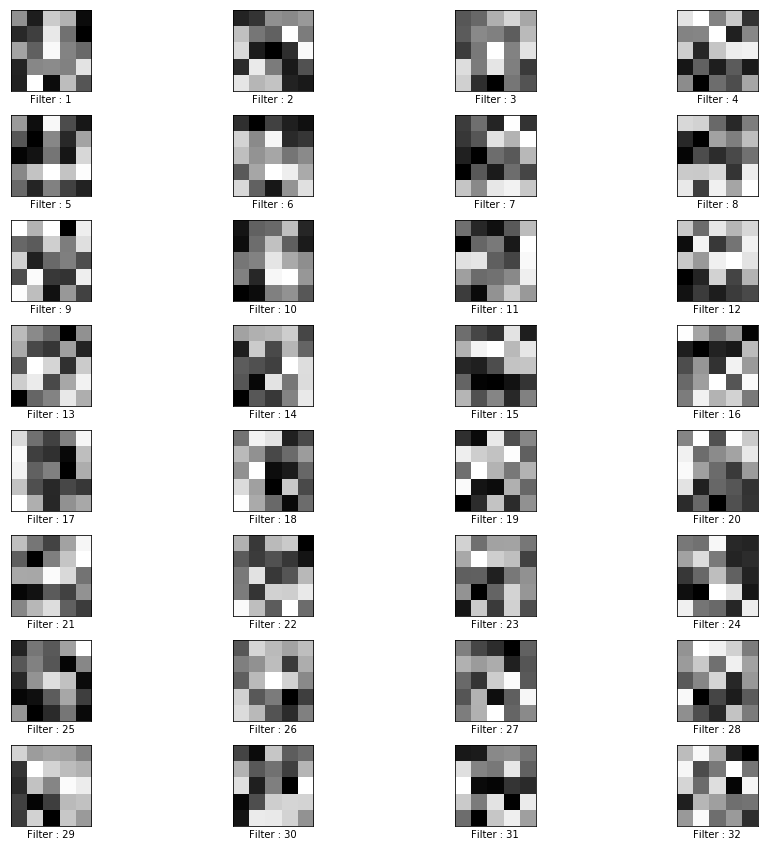

In [31]:
#plotting filters of the first convolutional layer
fig, axes = plt.subplots(8, 4, figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
        ax.imshow(conv_layer1_filters_img[:,:,i], cmap='gray')
        xlabel = "Filter : {}".format(i+1)
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([]) 
plt.show()

In [32]:
test_image=np.reshape(data.test.images[0], [1,784])
conv_layer1_output=(sess.run(out_layer1,
               feed_dict={
                   x:test_image
               }))

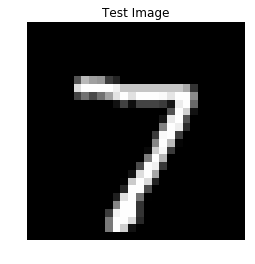

In [33]:
plt.imshow(np.reshape(data.test.images[0], [28,28]), cmap='gray')
plt.title('Test Image')
plt.axis('off')
plt.show()

In [34]:
print(conv_layer1_output.shape)

(1, 14, 14, 32)


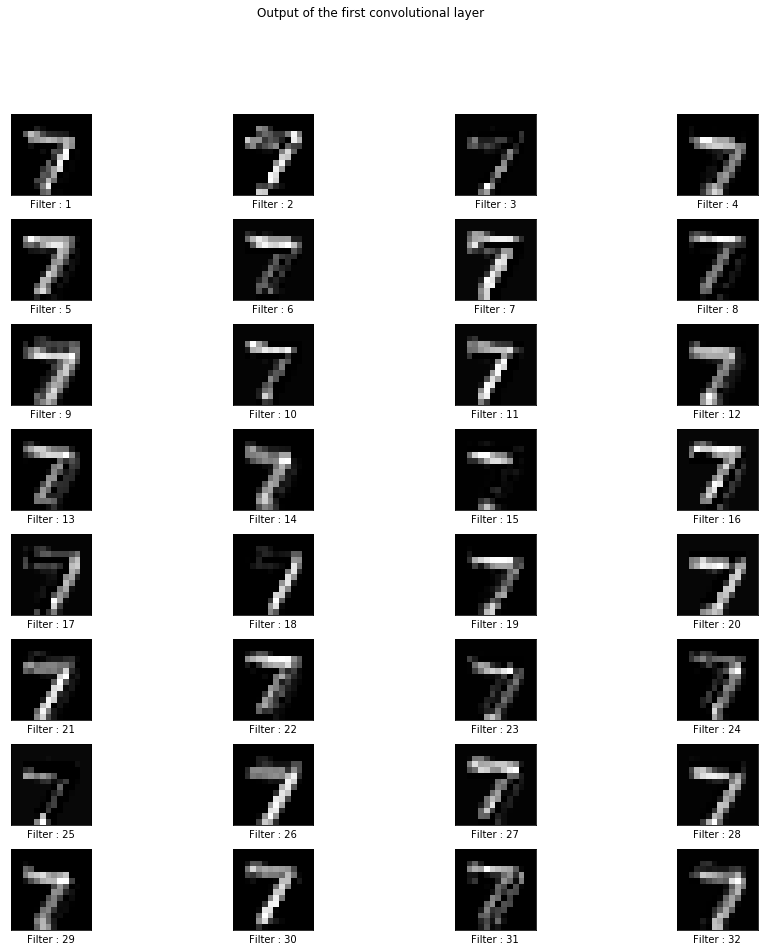

In [35]:
conv_layer1_output_img=conv_layer1_output[0,:,:,:]
fig, axes = plt.subplots(8, 4, figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
        ax.imshow(conv_layer1_output_img[:,:,i], cmap='gray')
        xlabel = "Filter : {}".format(i+1)
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])      
fig.suptitle('Output of the first convolutional layer')  
plt.show()

[10  3  5  9  9 14 10]
